<a href="https://colab.research.google.com/github/Siddhesh-Patil/Image-Denoising/blob/master/ImageDenoising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
import numpy
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from keras.datasets import mnist

In [84]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

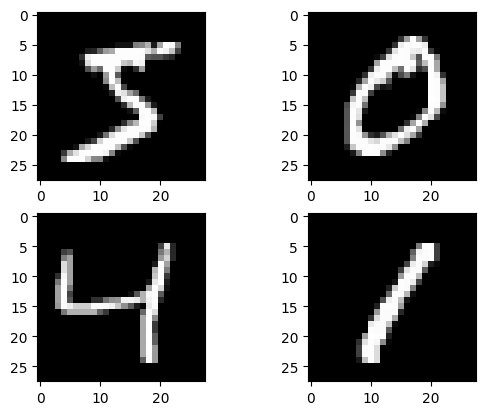

In [85]:
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [86]:
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0],
num_pixels).astype('float32')

In [87]:
X_test = X_test.reshape(X_test.shape[0],
num_pixels).astype('float32')
X_train = X_train / 255
X_test = X_test / 255
X_train.shape


(60000, 784)

In [51]:
X_test.shape

(10000, 784)

In [88]:
noise_factor = 0.3
x_train_noisy = X_train + noise_factor * numpy.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
x_test_noisy = X_test + noise_factor * numpy.random.normal(loc=0.0,
scale=1.0, size=X_test.shape)
x_train_noisy = numpy.clip(x_train_noisy, 0., 1.)
x_test_noisy = numpy.clip(x_test_noisy, 0., 1.)

In [90]:
# create model
model = Sequential()
model.add(Dense(500, input_dim=num_pixels, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(400, activation='relu'))
model.add(Dense(400, activation='relu'))
model.add(Dense(500, activation='relu'))

model.add(Dense(784, activation='sigmoid'))

In [91]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [92]:
model.fit(x_train_noisy, X_train, validation_data=(x_test_noisy,
X_test), epochs=10, batch_size=200)

Epoch 1/10
300/300 [==============================] - 18s 50ms/step - loss: 0.0536 - val_loss: 0.0313
Epoch 2/10
300/300 [==============================] - 15s 50ms/step - loss: 0.0257 - val_loss: 0.0211
Epoch 3/10
300/300 [==============================] - 15s 50ms/step - loss: 0.0196 - val_loss: 0.0175
Epoch 4/10
300/300 [==============================] - 15s 51ms/step - loss: 0.0166 - val_loss: 0.0157
Epoch 5/10
300/300 [==============================] - 16s 52ms/step - loss: 0.0149 - val_loss: 0.0145
Epoch 6/10
300/300 [==============================] - 16s 53ms/step - loss: 0.0136 - val_loss: 0.0135
Epoch 7/10
300/300 [==============================] - 15s 50ms/step - loss: 0.0127 - val_loss: 0.0126
Epoch 8/10
300/300 [==============================] - 14s 48ms/step - loss: 0.0119 - val_loss: 0.0121
Epoch 9/10
300/300 [==============================] - 14s 48ms/step - loss: 0.0114 - val_loss: 0.0117
Epoch 10/10
300/300 [==============================] - 15s 50ms/step - loss: 0.010

In [93]:
pred = model.predict(x_test_noisy)
pred.shape

313/313 [==============================] - 1s 4ms/step


(10000, 784)

Test Images


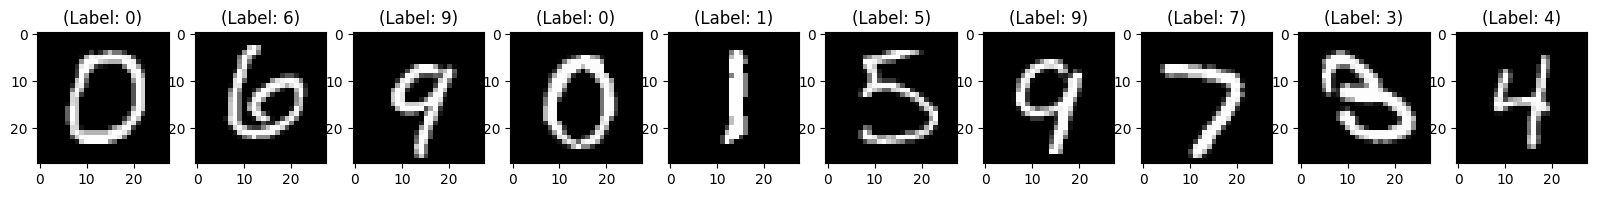

Test Images with Noise


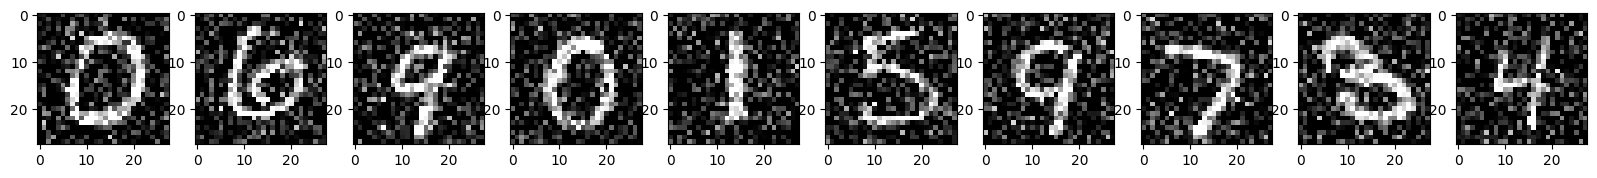

Reconstruction of Noisy Test Images


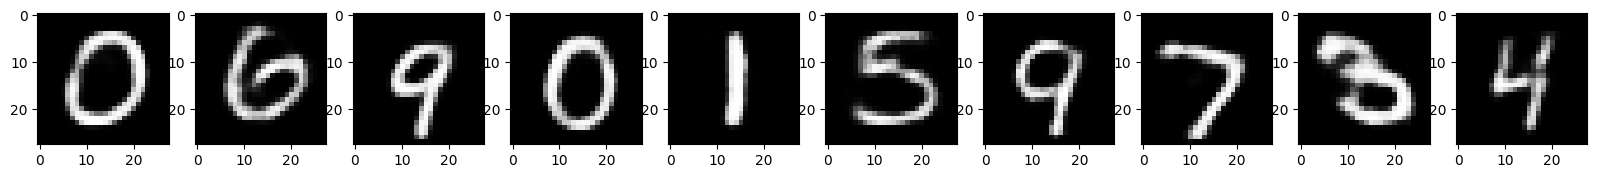

In [95]:
X_test = numpy.reshape(X_test, (10000,28,28)) *255
pred = numpy.reshape(pred, (10000,28,28)) *255
x_test_noisy = numpy.reshape(x_test_noisy, (-1,28,28)) *255
plt.figure(figsize=(20, 4))
print("Test Images")
for i in range(10,20,1):
  plt.subplot(2, 10, i+1)
  plt.imshow(X_test[i,:,:], cmap='gray')
  curr_lbl = y_test[i]
  plt.title("(Label: " + str(curr_lbl) + ")")
plt.show()
plt.figure(figsize=(20, 4))
print("Test Images with Noise")
for i in range(10,20,1):
  plt.subplot(2, 10, i+1)
  plt.imshow(x_test_noisy[i,:,:], cmap='gray')
plt.show()
plt.figure(figsize=(20, 4))
print("Reconstruction of Noisy Test Images")
for i in range(10,20,1):
  plt.subplot(2, 10, i+1)
  plt.imshow(pred[i,:,:], cmap='gray')
plt.show()